<a href="https://colab.research.google.com/github/ahmedoglu/car-price-prediction-using-linear-regression/blob/main/Car_Price_Estimation_with_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Estimate Car Prices**

*Mümin Ahmedoğlu*

*Lekaa Elmesilhy*


**1. Introduction**

We are required to model car prices with available explanatory variables. It will be used by management to understand how prices of a car vary across explanatory variables. They can appropriately manipulate car design, business strategy, etc., to match certain price levels. Besides, the model will be a good way for management to understand the dynamics of pricing in the new market so that they’ll have an idea about:

- What variables are important in predicting the price of a car
- How well do these variables describe the price of a car?
- Predicting a car price using some predictors.


**2. Data**

**2.1 Original Data Set**

This data is conducted from Kaggle website, also write the link into the References. There’re 205 observatons with no missing values. The data have11 categorical and 13 cantinuous variables with one continuous target variable. There’s an associated paper with this data which we’ll use to write a reaction paper about in the end of this project.

**2.2 Data Preprocessing**


Since the data have a moderate size there is no data reduction applied. After studying and visualizing the data we’ve found that some categorical variables are having extremely imbalanced groups. Therefore, we found it useful for the model building process to delete the imbalanced categorical variables. The deleted variables are listed as follows:
- *CarName [Categorical]:* The name of the car which includes its brand and model, includes 146 unique groups.
- *Enginlocation [Categorical]:* The location of the engine in the car, includes 203 front and 3 rear.

We have randomly split our data into a training set and a validation set. Since we have 9 categorical columns, we had 29 combinations, we took random 70% of each combination to be training set and 30% to be validation set. We did that to have the data distributed between the training and validation in a way that keeps balanced categorical observations.
Note: there were 35 combinations which have only one observation each. These observations are used in the training set.
The raining data set has 143 observation (70%) while the validation set has 62 observation (30%).

We have done standardization for the continuous predictors to have scaled data. Therefore, for any estimation or prediction usage, the observation needs to be standardized first.

**2.3 Preprocessed Data Set Description**

We are left with 22 predictors, 9 categorical, and 13 continuous, that may be affecting
our target variable (the price of the car). We have 205 observations.
We have adjusted (coded) the data in a way that for some categorical variables we coded the group which has the most frequency as 0 and others as 1. Our predictors after the data coding step are listed as follows:
Symbolling [Categorical]: The symbolism corresponds to the degree to which the car is riskier than its price indicates. The car is initially assigned a risk factor symbol associated with its price. Then, if it is riskier (or less), this symbol is adjusted by moving it up (or down) the scale. It has integer values from -2 to 3.
• 0 if the observation is -2 -1 or 0
• 1 if the observation is 1 2 or 3
includes 92 (-2 -1 and 0) and 113 (1 2 and 3).
- Feultype [Categorical]: The type of fuel the car uses.
• 0 if the observation is Gas
• 1 if the observation is diesel includes 185 gas and 20 diesels.
- Aspiration [Categorical]: A naturally aspirated engine, also known as a commonly aspirated engine, is an internal combustion engine in which the air intake depends solely on atmospheric pressure and does not have forced induction through a turbocharger or supercharger.
• 0 if the observation is std
• 1 if the observation is turbo includes 167 std and 38 turbo.
- Doornumber [Categorical]: The number of doors the car has.
• 0 if the observation is four
• 1 if the observation is two includes 115 four and 90 two.
- Carbody [Categorical]: The shape of the body of each car.
• 0 if the observation is sedan
• 1 if the observation is other includes 96 sedan and 109 other.

- Drivewheel [Categorical]: A drive wheel is a wheel in a vehicle that transmits force by converting torque into tractive force from the tires to the road, causing the vehicle to move.
• 0 if the observation is fwd
• 1 if the observation is other includes120 fwd and 85 others.
- Enginetype [Categorical]: The type of engine of each car.
• 0 if the observation is ohc
• 1 if the observation is other includes 148 ohs and 57 others.
- Cylindernumber [Categorical]: The number of cylinders in the engine of the car.
• 0 if the observation is four
• 1 if the observation is other includes159 four and 46 other.
- Fuelsystem [Categorical]: A car's fuel system consists of components that deliver fuel from the tank to the engine, including the fuel pump, fuel lines, fuel pressure regulator, fuel filter, and fuel injectors. Fuel system components are built to last, so the fuel filter is the only part that will likely need to be replaced on schedule.
• 0 if the observation is diesel
• 1 if the observation is other includes 94 mpfi and 111 other.
- Wheelbase [Continuous]: The wheelbase of a car is the distance between the centers of the front and rear wheels. Therefore, it is less than the total length of the vehicle as measured from the front and rear.
- Carlength [Continuous]: The length of the car.
- Carwidth [Continuous]: The width of the car.
- Carhight [Continuous]: The height of the car.
- Curbweight [Continuous]: The weight of the car.
- Enginesize [Continuous]: The size of the engine of the car.
- Boreratio [Continuous]: The Bore-Stroke Ratio is the ratio between the bore
of the engine and the length of the piston stroke.
- Stroke [Continuous]: The stroke length is how far the piston travels in the
cylinder, which is determined by the cranks on the crankshaft. Engine displacement is calculated by multiplying the lateral area of the cylinder (defined by the bore) by the stroke length.
- Compressionratio [Continuous]: Compression ratios typically range from 8: 1 to 10: 1. A higher compression ratio - say 12: 1 to 14: 1 - means higher combustion efficiency. Higher compression ratios and combustion efficiencies
mean more power with less fuel and less exhaust.
- Horsepower [Continuous]: Engine power is called horsepower.
Mathematically speaking, one horsepower is the power required to move 550 pounds of one foot in one second, or the power required to move 33,000 pounds of one foot in one minute.
- Peakrpm [Continuous]: The maximum rpm a car engine can reach.
- Citympg [Continuous]: This number is the average MPG for your vehicle in
the city. Since city driving tends to mean rougher roads and frequent stops and
starts, this number is usually the lowest of the three.
- Highwaympg [Continuous]: Highway MPG is the average MPG for your
vehicle on the highway. Even if you drive faster and often for longer periods of time, the highways are smoother than city roads and keep your engine running at a consistent level that requires less gas.
- Price [Continuous]: The target variable is the estimated price of the car.

**Descriptive statistcs of the continuous predictors:**
 
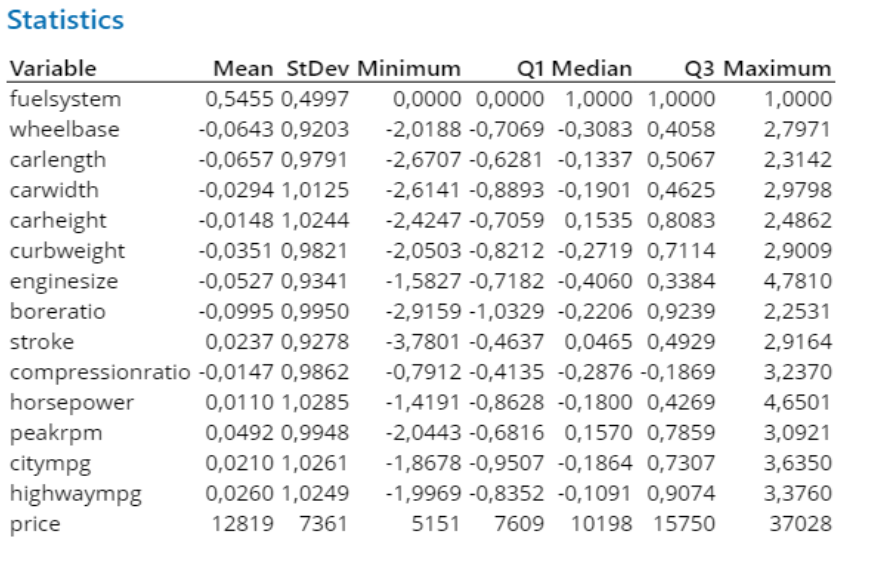

**3. Multiple Linear Regression (MLR) Analysis**

The strategy of MLR analysis for this project is followed as suggested in the textbook which was used in the course, Applied Linear Statistical Models by Kutner, Nachtsheim, and Neter (5th edition), and the open access course material provided by Penn State University for STAT501 course.

**3.1 Relation of Variables**

Because of the large number of predictors specially the categorical ones, we’ll visualize the matrix scatter plot of the continuous predictors only.

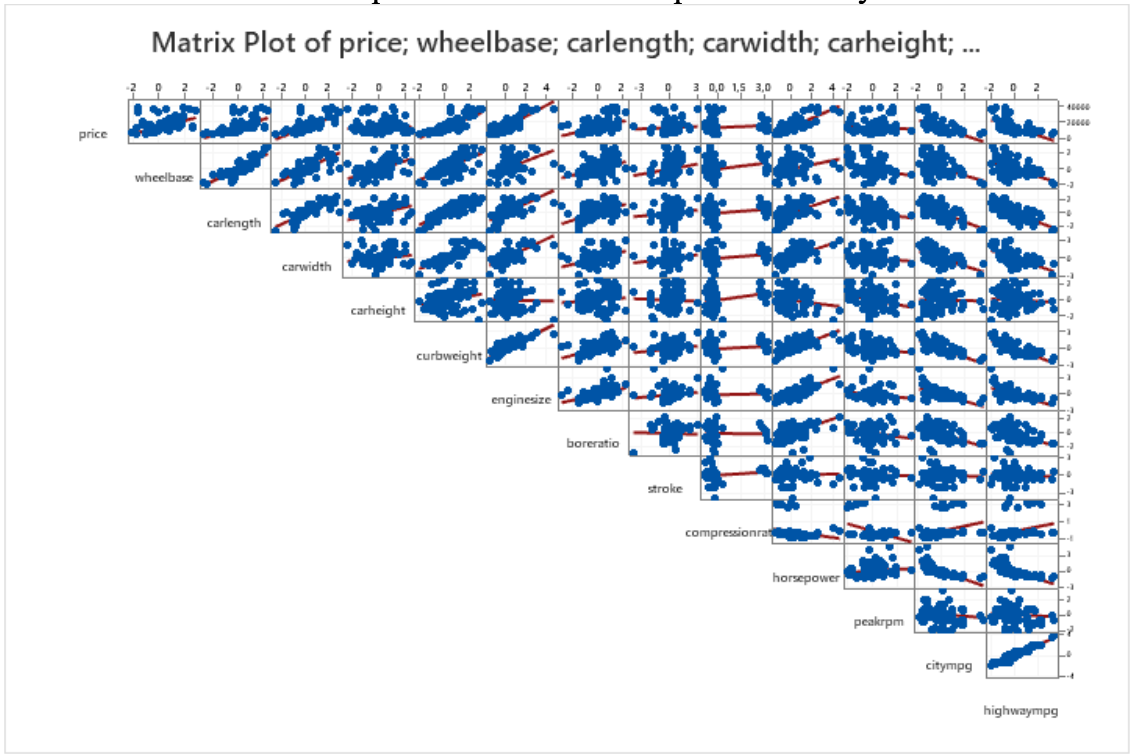

Visualizing the above scatter matrix plot of the continuous predictors, we’ll first comment on the relationship between the response and each predictor. Then we’ll comment on the relationship between the predictors.

The relationship between the response and each predictor:
It seems that the response has a strong positive linearship with the following predictors:

→ Wheelbase, carlength, carwidth, curbweight, enginesize and horsepower. It seems that the response has a strong negative linearship with the following predictors:

→ Citympg and highwaympg.
The relationship between the predictors:
It seems that there’s a strong positive linearship with the following predictors:

→ Wheelbase, carlength, carwidth, curbweight and horsepower. → curbweight, enginesize and horsepower.

→ Citympg and highwaympg.
It seems that there’s a strong positive linearship with the following predictors: → Highwaympg and curbweight, carlength.

→ Citympg and carlength.

**3.2 Variable Selection**

Because there’s too many variables, we’ve choosen 2 candidate models using Stepwise Regression and Best Subsets analysis.

**3.3 Development of Model 1**

The following model is fitted to the data to explain the relationship between the price of a car and some important features of it.

𝒚 = 𝜷𝟎 + 𝜷𝟏𝑒𝑛𝑔𝑖𝑛𝑒𝑠𝑖𝑧𝑒 + 𝜷𝟐𝑐𝑦𝑙𝑖𝑛𝑑𝑒𝑟𝑛𝑢𝑚𝑏𝑒𝑟 + 𝜷𝟑 𝑐𝑎𝑟𝑤𝑖𝑑𝑡h +
𝜷𝟒 h𝑜𝑟𝑠𝑒𝑝𝑜𝑤𝑒𝑟+𝜷𝟓𝑐𝑎𝑟h𝑒𝑖𝑔h𝑡+𝜷𝟔𝑐𝑜𝑚𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛𝑟𝑎𝑡𝑖𝑜+𝜷𝟕𝑠𝑡𝑟𝑜𝑘𝑒+ 𝜷𝟖 𝑒𝑛𝑔𝑖𝑛𝑒𝑡𝑦𝑝𝑒 + 𝜷𝟗 𝑑𝑟𝑖𝑣𝑒𝑤h𝑒𝑒𝑙 + 𝜷𝟏𝟎 𝑝𝑒𝑎𝑘𝑟𝑝𝑚 + 𝜺

where 𝜺~𝑵𝑰𝑰𝑫(𝟎, 𝝈𝟐).
**The fitted regression equation is obtained as the following:**

Price = 12104 + 3324 enginesize + 3799 cylindernumber + 1348 carwidth + 1697 horsepower + 557 carheight + 835 compressionratio - 957 stroke - 2030 enginetype + 1462 drivewheel + 734 peakrpm

**3.3.1 Analysis Step 1 (Minitab outputs in Appendix 1 – 3.3.1)**

**• Checking Normality:**

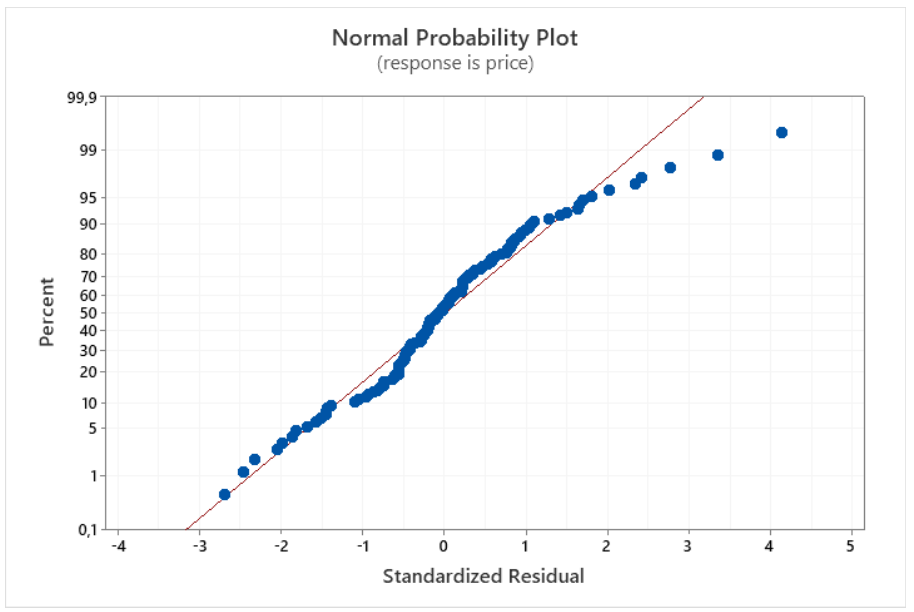